In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
scorer = make_scorer(fbeta_score, beta=1.5)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('data/data.csv', encoding='ISO-8859-1')

print(train.shape[0], 'observations and', train.shape[1], 'features')

8378 observations and 195 features


In [3]:
train.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [4]:
# What kind of data are we dealing with?
train.dtypes.value_counts()

float64    174
int64       13
object       8
dtype: int64

In [5]:
train.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,no_order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
train.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,no_order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
# Men = 1 and women = 0
train.groupby('iid').mean().gender.value_counts()

1.0    277
0.0    274
Name: gender, dtype: int64

Total 277 MEN, 274 FEMALE

JOHN - Find the total participants matched percentage.
16% is invalid data because it uses total 8k+ set.
should base on 551 datatset.


In [8]:
#Percentage of pairs matched
train['match'].value_counts(normalize=True)

0    0.835283
1    0.164717
Name: match, dtype: float64

We can see that 16% are matched up

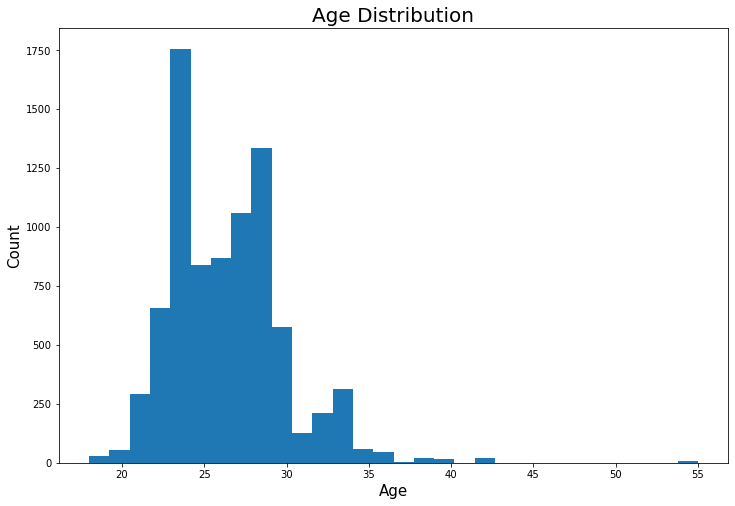

In [9]:
#Age differences in the data
ax = train.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=20)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(False)

In [10]:
# 1 is male 0 is female
# Aggregate function of pandas 
train[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])
# Min age for male is 19, 
# Min age for female is 18

age                         
             mean median   min   max count
gender                                    
0       26.105851   26.0  19.0  55.0  4119
1       26.609270   27.0  18.0  42.0  4164

In [11]:
# Mapping field to respective numbers
train['field_cd'] = train.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med Sci',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Bio. Sc.', 11: 'Soc. Wrk.', 12: 'Und.', 13: 'Pol. Sci.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(train.field_cd)
train.field_cd.value_counts(dropna=False)

Econ         1925
Bio. Sc.      993
Eng.          864
Pol. Sci.     709
Soc. Sc.      696
Law           665
Educ.         626
Soc. Wrk.     468
Journ.        325
Hist.         241
Math          207
Arts          187
Med Sci       143
Film          126
NaN            82
Oth.           52
Lang.          40
Und.           19
Arch.          10
Name: field_cd, dtype: int64

Text(0.5, 0, '')

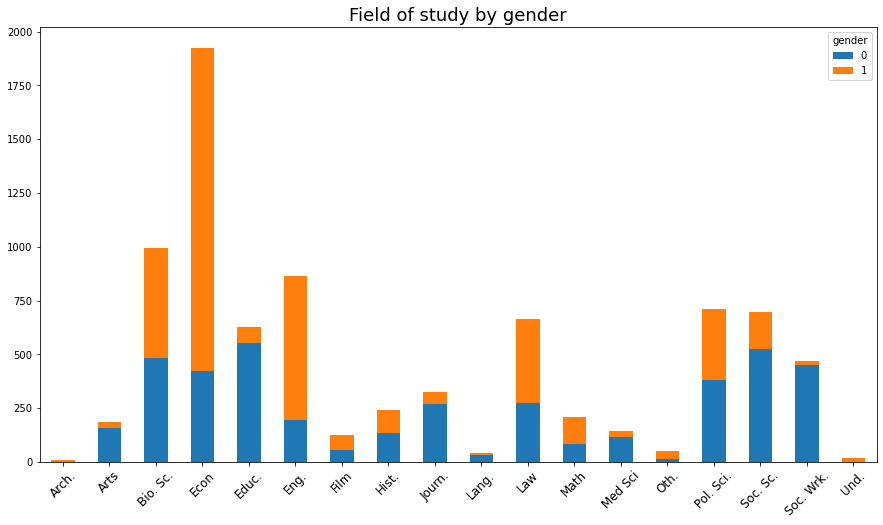

In [12]:
# Plotting the field of study based on gender. 
#1 is Male, 0 is Female

studies = train[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
ax = studies.plot(kind='bar', figsize=(15,8), stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Field of study by gender', fontsize=18)
ax.set_xlabel('',fontsize=1)

Text(0.5, 1.0, 'Correlation between interests')

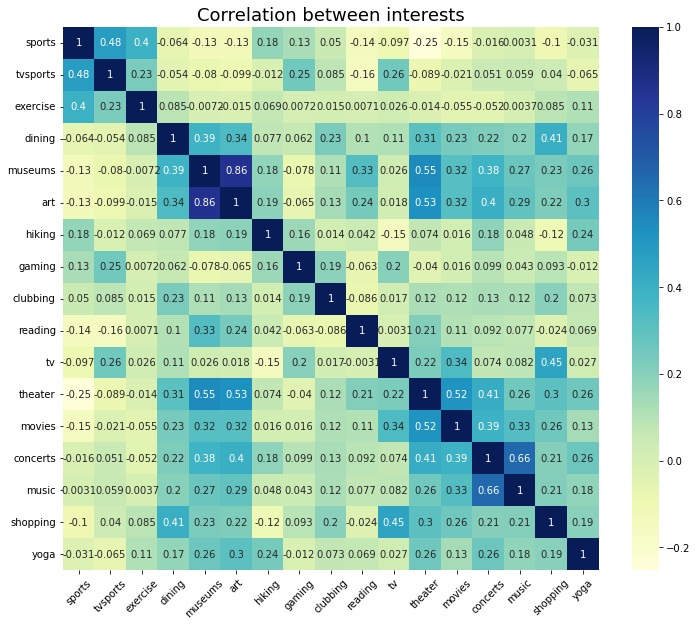

In [13]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
# Plotting correlation heatmap
corr = train[['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True) # Color can use 'mako', looks nice
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

In [14]:
#Do install PANDASQL FIRST.
# pip install -U pandasql IN ANACONDA

#Looking at the match results
#print("Both rejects")
import pandasql as pdsql # use pandasql to do table joins
pysql = lambda q: pdsql.sqldf(q, globals())
both_reject = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.dec = 0 and b.dec = 0"
join_reject = pysql(both_reject)
join_reject


,count(*)
0,2718


Some interesting relationship with interests. Not surprising for many interest which make sense, like music and concerts, art and museum.. 


In [15]:
# One ok one not ok
# Use based on dec variable
either = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.dec = 1 and b.dec = 0"
join_either = pysql(either)
join_either

,count(*)
0,2135


2135*2 + 2718 = 6988 Times 2 because 0,1. and 1,0 Either 1 agree or 1 disagree, 2 diff scenario

In [16]:
# One ok one not ok
#Match data is 0. 
#No. of not match, here we use Match Column to cross validate 
either_match = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.match = 0"
join_either_match = pysql(either_match)
join_either_match

,count(*)
0,6988


In [17]:
# Both agrees with each other
#base on both decision
agree = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.dec = 1 and b.dec = 1"
join_agree = pysql(agree)
join_agree

,count(*)
0,1380


In [18]:
#Both agrees with each other
#Both matches.
#Here we cross validate using match col. Where both DEC  = 1 means matched
agree_match = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.match = 1"
join_agree_match = pysql(agree_match)
join_agree_match

,count(*)
0,1380


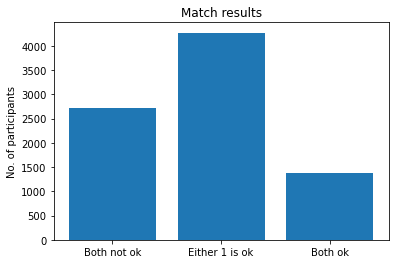

In [19]:
#%matplotlib inline
#Here We see That ok means like another partner
import matplotlib.pyplot as plt
hist = plt.figure()
item = ('Both not ok', 'Either 1 is ok', 'Both ok')
y_pos = np.arange(len(item)) # 3 items
y = [2718, 2135*2, 1380] #times  2, because male and female decision
plt.bar(y_pos, y, align='center', alpha=1)
plt.title("Match results")
plt.ylabel("No. of participants")
plt.xticks(y_pos, item)
plt.show()
# We can see that having a match is relatively low, (3rd col)

In [20]:
#No, of like they give during the event
query_count = "select count(dec) from train where dec = 1 group by iid"
iid_count = pysql(query_count)
iid_count

,count(dec)
0,8
1,4
2,3
3,6
4,6
...,...
515,9
516,9
517,7
518,8


In [21]:
# Which point do they give their first 'like' decision
# Order tells us the amount of dates before meeting the partner that night
#MIGHT DELETE
query_order = "select min(no_order) from train d where dec = 1 group by d.iid"
iid_order = pysql(query_order)
iid_order.head(5)

,min(no_order)
0,1
1,1
2,4
3,2
4,2


In [22]:
#Average order for matched pairs?
match_order = "select avg(no_order), round from train where match = 1 group by wave"
average = pysql(match_order)
average
## Average dates met before meeting parter. 
#ie. Meet 10 people, 5th person will be match, on average. 
# different waves have different number of dates(round)

,avg(no_order),round
0,5.387097,10
1,7.854839,16
2,5.461538,10
3,9.646154,18
4,5.666667,10
5,3.800000,5
6,8.813953,16
7,5.500000,10
8,10.629032,20
9,5.600000,9


In [23]:
sum = 0
for index, row in average.iterrows():
   sum = sum + row['avg(no_order)']/row['round']
sum/20

# Average all over 57% match during rounds

0.5744744073683088

In [24]:
# Percentage of same field/career for matched pairs
field = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.field = b.field and a.wave = b.wave and a.match = 1"
count_field = pysql(field)
count_field
# 50 Matches of same field

,count(*)
0,50


In [25]:
total_matches = "select count(*) from train a join train b where a.iid = b.pid and a.pid = b.iid and a.wave = b.wave and a.match = 1"
count_matches = pysql(total_matches)
count_matches

#TOTAL MATCHES 

,count(*)
0,1380


In [26]:
# Percentage of people who match have same field, (education)
print("Percentag of People who match in same field:", 50/1380)
#3.6% , we can see that field  of study is not important in getting a date

Percentag of People who match in same field: 0.036231884057971016


In [28]:
pd.set_option('display.max_rows', None)
# This to print out all rows


In [29]:
# Gender 1 is MALE
train[train['gender']==1].mean()
#Men prefer attractive, younger, notice the attributes.

iid         291.902003
id            8.896494
gender        1.000000
idg          17.694802
condtn        1.827849
wave         11.343348
round        16.961850
position      9.036719
positin1      9.328843
no_order      8.964235
partner       9.019313
pid         275.430210
match         0.164521
int_corr      0.195721
samerace      0.395327
age_o        26.105851
race_o        2.780488
pf_o_att     18.055224
pf_o_sin     18.305008
pf_o_int     21.002502
pf_o_fun     17.147292
pf_o_amb     12.827222
pf_o_sha     12.704194
dec_o         0.364568
attr_o        5.919422
sinc_o        7.099778
intel_o       7.447362
fun_o         6.280555
amb_o         6.952773
shar_o        5.407012
like_o        5.991850
prob_o        5.215672
met_o         1.960990
age          26.609270
race          2.734068
imprace       3.464542
imprelig      3.096310
goal          2.158361
date          4.861405
go_out        2.176569
career_c      5.257280
sports        7.029947
tvsports      4.983709
exercise   

In [30]:
# Gender 0 is FEMALE
train[train['gender']==0].mean()
#Notice the attributes,

iid         275.430210
id            9.024140
gender        0.000000
idg          16.958652
condtn        1.829828
wave         11.358509
round        16.782027
position      9.048757
positin1      9.262707
no_order      8.891013
partner       8.907744
pid         292.297323
match         0.164914
int_corr      0.196300
samerace      0.396272
age_o        26.621901
race_o        2.732949
pf_o_att     26.893883
pf_o_sin     16.497231
pf_o_int     19.545869
pf_o_fun     17.769880
pf_o_amb      8.554378
pf_o_sha     10.996568
dec_o         0.474665
attr_o        6.461401
sinc_o        7.251053
intel_o       7.291202
fun_o         6.520164
amb_o         6.604591
shar_o        5.541148
like_o        6.276097
prob_o        5.200866
met_o         1.959439
age          26.105851
race          2.780488
imprace       4.108848
imprelig      4.213576
goal          2.085333
date          5.153212
go_out        2.139394
career_c      5.298654
sports        5.813333
tvsports      4.162424
exercise   

In [31]:
#imprace  - how important date be of the same racial/ethnic background?
train.pivot_table([ 'imprace', 'race'],
               ['match'], aggfunc=np.sum, fill_value = 0)

,imprace,race
match,,
0,26673,19210
1,4737,3716


In [33]:
# PF_O_SHA is preferred shared interest
train.pivot_table([ 'pf_o_sha', 'race'],
               ['match'], aggfunc=np.sum, fill_value = 0)

,pf_o_sha,race
match,,
0,82549.16,19210
1,15167.92,3716


Preferred common interest has 15.5% Race has 16.2% We can see that there are not much difference between the importance of shared interest and race, although race has higher importance

In [34]:
train.shape

(8378, 195)

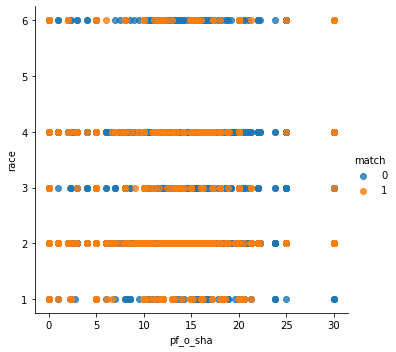

In [35]:
#Plot the race and shared interest
sns.lmplot('pf_o_sha', 'race', data=train, hue='match', fit_reg=False)

we can see that the shared interest and race does not really matter

### NUMBER OF RACE IN THE DATASET

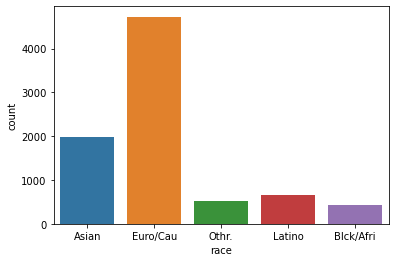

In [36]:
#No. of races in the data set
train['race'] = train.race.map({1: 'Blck/Afri', 2: 'Euro/Cau', 3: 'Latino', 4: 'Asian',
                                 5: 'Native', 6: 'Othr.'})

sns.countplot(x=train['race'], data=train); 


# Many Caucasians